In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import errors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt

In [152]:
iter = 100
test_size = 0.3
learning_rate = 0.1

def sigmoid(x):
    ret = 1 / (1 + np.exp(-x))
    return(ret)

def divide(a, b):
    result = np.divide(a, b, out=np.zeros_like(a), where=b!=0)
    return(result)

In [210]:
class LogisticRegression:
    
    def __init__(self, datafile = None):
        if datafile:
            self.read_csv(datafile)
        self.activation = sigmoid

    def read_csv(self, datafile):
        try:
            df = pd.read_csv(datafile)
            df.fillna(df.median(), inplace = True)
            features = list(df.columns[6:])
            self.X = df[features].to_numpy()
            one_hot_encoding = pd.get_dummies(df["Hogwarts House"], drop_first = False)
            self.houses = list(one_hot_encoding.columns)
            self.y = one_hot_encoding.to_numpy()
        except (FileNotFoundError, errors.EmptyDataError) as e:
            print(e)
        except KeyError as e:
            print(f"The csv file does not contain the expected column '{e}'")
    
    def feature_scale_normalise(self):
        self.scaler = StandardScaler()
        self.scaler.fit(self.X)
        self.X = self.scaler.transform(self.X)
    
    def split_data(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=42)
    
    def init_weights(self):
        self.thetas = np.zeros((self.X_train.shape[1], self.y_train.shape[1]))

    def add_bias_units(self):
        bias_units = np.ones((model.X.shape[0], 1))
        self.X = np.concatenate((bias_units, self.X), axis = 1)
    
    def hypothesis(self, X):
        z = np.matmul(X, self.thetas)
        self.H = self.activation(z)
    
    def compute_loss_gradient(self, X, y):
        error = self.H - y
        self.loss_gradient = np.matmul(X.T, error) / len(X)

    def gradient_descent(self):
        self.thetas = self.thetas - (learning_rate * self.loss_gradient)
    
    def fit(self):
        self.init_validation_metrics()
        for i in range(iter):
            self.validate(i)
            self.hypothesis(self.X_train)
            self.compute_loss_gradient(self.X_train, self.y_train)
            self.gradient_descent()
    
    def init_validation_metrics(self):
        self.true_positive = np.zeros((4, 1))
        self.true_negative = np.zeros((4, 1))
        self.false_negative = np.zeros((4, 1))
        self.false_positive = np.zeros((4, 1))
        self.init = 1
        self.iterations = []
    
    def calculate_perfomance(self):
        self.precision = divide(self.true_positive, (self.true_positive + self.false_positive))
        self.sensitivity = divide(self.true_positive, (self.true_positive + self.false_negative))
        self.specificity = divide(self.true_negative, (self.true_negative + self.false_positive))
        self.accuracy = divide((self.true_positive + self.true_negative), (self.true_positive + self.true_negative + self.false_positive + self.false_negative))
        self.F1_score = (2 * (divide((self.precision * self.sensitivity), (self.precision + self.sensitivity))))

    
    def validate(self, iter):
        for i in range(len(self.X_test)):
            self.hypothesis(self.X_test)
            predicted_house = np.argmax(self.H[i])
            real_house = np.argmax(self.y_test[i])
            if predicted_house == real_house:
                self.true_positive[predicted_house] += 1
                for index, nb in enumerate(model.H[i]):
                    if index != i:
                        self.true_negative[index] += 1
            else:
                self.false_positive[predicted_house] += 1
                self.false_negative[real_house] += 1
        self.calculate_perfomance()
        if self.init == 1:
            self.precision_total = self.precision
            self.sensitivity_total = self.sensitivity
            self.specificity_total = self.specificity
            self.accuracy_total = self.accuracy
            self.F1_score_total = self.F1_score
        else:
            self.precision_total = np.append(self.precision_total, self.precision, 1)
            self.sensitivity_total = np.append(self.sensitivity_total, self.sensitivity, 1)
            self.specificity_total = np.append(self.specificity_total, self.specificity, 1)
            self.accuracy_total = np.append(self.accuracy_total, self.accuracy, 1)
            self.F1_score_total = np.append(self.F1_score_total, self.F1_score, 1)
        self.iterations.append(iter)
        self.init = 0

In [211]:
datafile = "datasets/dataset_train.csv"
model = LogisticRegression(datafile)
model.feature_scale_normalise()
model.add_bias_units()
model.split_data()
model.init_weights()
model.fit()

In [204]:
def show_graph(name, data):
    plt.title(f"{name} evolution")
    plt.xlabel("iterations")
    plt.ylabel(name)
    x = model.iterations
    for index, house in enumerate(model.houses):
        y = data[index]
        plt.plot(x, y, label=str(house))
    plt.legend()
    plt.show()

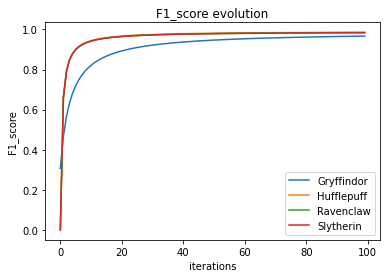

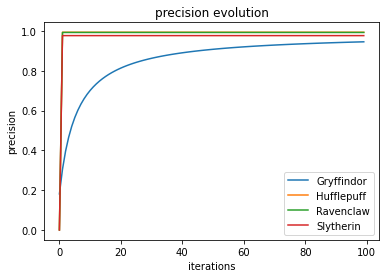

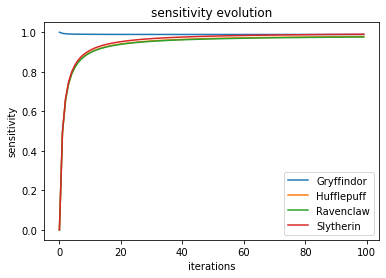

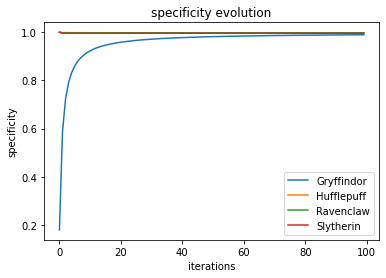

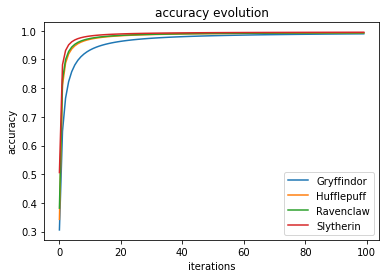

In [212]:
show_graph("F1_score", model.F1_score_total)
show_graph("precision", model.precision_total)
show_graph("sensitivity", model.sensitivity_total)
show_graph("specificity", model.specificity_total)
show_graph("accuracy", model.accuracy_total)
